In [664]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

import numpy as np
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler



import matplotlib.pyplot as plt
%matplotlib inline

In [665]:
df = pd.read_csv('data/acoes/DISB34.SA.csv')
df = df.dropna()


df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-02,175.470001,175.470001,175.470001,175.470001,175.470001,0
1,2014-01-03,175.470001,175.470001,175.470001,175.470001,175.470001,0
2,2014-01-06,175.470001,175.470001,175.470001,175.470001,175.470001,0
3,2014-01-07,180.100006,180.100006,180.100006,182.070007,182.070007,200
4,2014-01-08,180.410004,180.410004,180.410004,179.710007,179.710007,6400


In [666]:
df.shape

(1335, 7)

In [667]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1330,2019-05-10,535.270020,535.270020,529.789978,529.789978,529.789978,900
1331,2019-05-13,529.000000,529.289978,522.190002,529.289978,529.289978,1500
1332,2019-05-14,529.750000,536.859985,529.750000,536.859985,536.859985,700
1333,2019-05-15,537.510010,537.510010,537.510010,537.510010,537.510010,300
1334,2019-05-16,543.400024,548.200012,543.400024,548.200012,548.200012,4200


In [668]:
df['last_close'] = df.apply(lambda row: df['Close'].iloc[row.name - 1], axis =1)

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,last_close
0,2014-01-02,175.470001,175.470001,175.470001,175.470001,175.470001,0,548.200012
1,2014-01-03,175.470001,175.470001,175.470001,175.470001,175.470001,0,175.470001
2,2014-01-06,175.470001,175.470001,175.470001,175.470001,175.470001,0,175.470001
3,2014-01-07,180.100006,180.100006,180.100006,182.070007,182.070007,200,175.470001
4,2014-01-08,180.410004,180.410004,180.410004,179.710007,179.710007,6400,182.070007


In [669]:
df['last_volume'] = df.apply(lambda row: df['Volume'].iloc[row.name - 1], axis =1)

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,last_close,last_volume
0,2014-01-02,175.470001,175.470001,175.470001,175.470001,175.470001,0,548.200012,4200
1,2014-01-03,175.470001,175.470001,175.470001,175.470001,175.470001,0,175.470001,0
2,2014-01-06,175.470001,175.470001,175.470001,175.470001,175.470001,0,175.470001,0
3,2014-01-07,180.100006,180.100006,180.100006,182.070007,182.070007,200,175.470001,0
4,2014-01-08,180.410004,180.410004,180.410004,179.710007,179.710007,6400,182.070007,200


In [670]:
df = df[1:].copy()

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,last_close,last_volume
1,2014-01-03,175.470001,175.470001,175.470001,175.470001,175.470001,0,175.470001,0
2,2014-01-06,175.470001,175.470001,175.470001,175.470001,175.470001,0,175.470001,0
3,2014-01-07,180.100006,180.100006,180.100006,182.070007,182.070007,200,175.470001,0
4,2014-01-08,180.410004,180.410004,180.410004,179.710007,179.710007,6400,182.070007,200
5,2014-01-09,182.649994,182.649994,181.130005,179.710007,179.710007,20500,179.710007,6400


In [671]:
df['Date'] = pd.to_datetime(df['Date'])

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,last_close,last_volume
1,2014-01-03,175.470001,175.470001,175.470001,175.470001,175.470001,0,175.470001,0
2,2014-01-06,175.470001,175.470001,175.470001,175.470001,175.470001,0,175.470001,0
3,2014-01-07,180.100006,180.100006,180.100006,182.070007,182.070007,200,175.470001,0
4,2014-01-08,180.410004,180.410004,180.410004,179.710007,179.710007,6400,182.070007,200
5,2014-01-09,182.649994,182.649994,181.130005,179.710007,179.710007,20500,179.710007,6400


In [672]:
df = df.set_index('Date')

In [673]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,last_close,last_volume
Date,,,,,,,,
2014-01-03,175.470001,175.470001,175.470001,175.470001,175.470001,0,175.470001,0
2014-01-06,175.470001,175.470001,175.470001,175.470001,175.470001,0,175.470001,0
2014-01-07,180.100006,180.100006,180.100006,182.070007,182.070007,200,175.470001,0
2014-01-08,180.410004,180.410004,180.410004,179.710007,179.710007,6400,182.070007,200
2014-01-09,182.649994,182.649994,181.130005,179.710007,179.710007,20500,179.710007,6400


In [674]:
train = df[:'2018']
test = df['2019':]

test.head()

,Open,High,Low,Close,Adj Close,Volume,last_close,last_volume
Date,,,,,,,,
2019-01-02,413.309998,413.309998,413.309998,413.309998,413.309998,1500,411.209991,500
2019-01-03,413.000000,413.000000,405.000000,405.000000,405.000000,300,413.309998,1500
2019-01-04,410.619995,410.619995,410.619995,410.619995,410.619995,600,405.000000,300
2019-01-07,415.100006,417.380005,411.910004,411.910004,411.910004,1200,410.619995,600
2019-01-08,413.869995,413.869995,413.869995,413.869995,413.869995,300,411.910004,1200


In [675]:
features = ['Open', 'last_close', 'last_volume']
target = 'Close'

In [676]:
'''x_train = train[features]
y_train = train[target]'''

'x_train = train[features]\ny_train = train[target]'

In [677]:
'''x_test = test[features]
y_test = test[target]'''

'x_test = test[features]\ny_test = test[target]'

In [678]:
model = Sequential()

model.add(Dense(20, activation='relu', input_dim=3))
model.add(Dense(15, activation='relu'))
model.add( Dense(1, activation='linear'))

In [679]:
scaler_features = MinMaxScaler(feature_range=(0, 1))

x_train = pd.DataFrame(
        data=scaler_features.fit_transform(train[features]),
        columns = features
)

x_test = pd.DataFrame(
        data=scaler_features.transform(test[features]),
        columns = features
)




x_train.head()

,Open,last_close,last_volume
0,0.017142,0.017355,0.00000
1,0.017142,0.017355,0.00000
2,0.032347,0.017355,0.00000
3,0.033365,0.039298,0.00277
4,0.040721,0.031452,0.08863


In [680]:
scaler_target = MinMaxScaler(feature_range=(0,1))

y_train = scaler_target.fit_transform(train.iloc[:, 3:4])
y_test = test[target]

In [681]:
y_train[:5]

array([[0.01735488],
       [0.01735488],
       [0.03929785],
       [0.03145158],
       [0.03145158]])

In [682]:
np.random.seed(27)
    
model.compile(
    optimizer='adam',
    loss='mae',
    metrics=['mean_absolute_error']
)

In [683]:
model.fit(x_train, y_train, epochs=30, batch_size=10)

Epoch 1/30
1242/1242 [==============================] - 0s 144us/sample - loss: 0.0711 - mean_absolute_error: 0.0711
Epoch 2/30
1242/1242 [==============================] - 0s 104us/sample - loss: 0.0052 - mean_absolute_error: 0.0052
Epoch 3/30
1242/1242 [==============================] - 0s 100us/sample - loss: 0.0060 - mean_absolute_error: 0.0060
Epoch 4/30
1242/1242 [==============================] - 0s 99us/sample - loss: 0.0054 - mean_absolute_error: 0.0054
Epoch 5/30
1242/1242 [==============================] - 0s 109us/sample - loss: 0.0047 - mean_absolute_error: 0.0047
Epoch 6/30
1242/1242 [==============================] - 0s 113us/sample - loss: 0.0043 - mean_absolute_error: 0.0043
Epoch 7/30
1242/1242 [==============================] - 0s 90us/sample - loss: 0.0042 - mean_absolute_error: 0.0042
Epoch 8/30
1242/1242 [==============================] - 0s 94us/sample - loss: 0.0045 - mean_absolute_error: 0.0045
Epoch 9/30
1242/1242 [==============================] - 0s 87us/sam

In [684]:
y_test[:5]

Date
2019-01-02    413.309998
2019-01-03    405.000000
2019-01-04    410.619995
2019-01-07    411.910004
2019-01-08    413.869995
Name: Close, dtype: float64

In [685]:
pred = model.predict(x_test)
pred = scaler_target.inverse_transform(pred)
pred[:5]


array([[414.63092],
       [414.70535],
       [411.74112],
       [416.34595],
       [415.3936 ]], dtype=float32)

In [686]:
metrics.mean_absolute_error(y_test, pred)

3.447136926587978

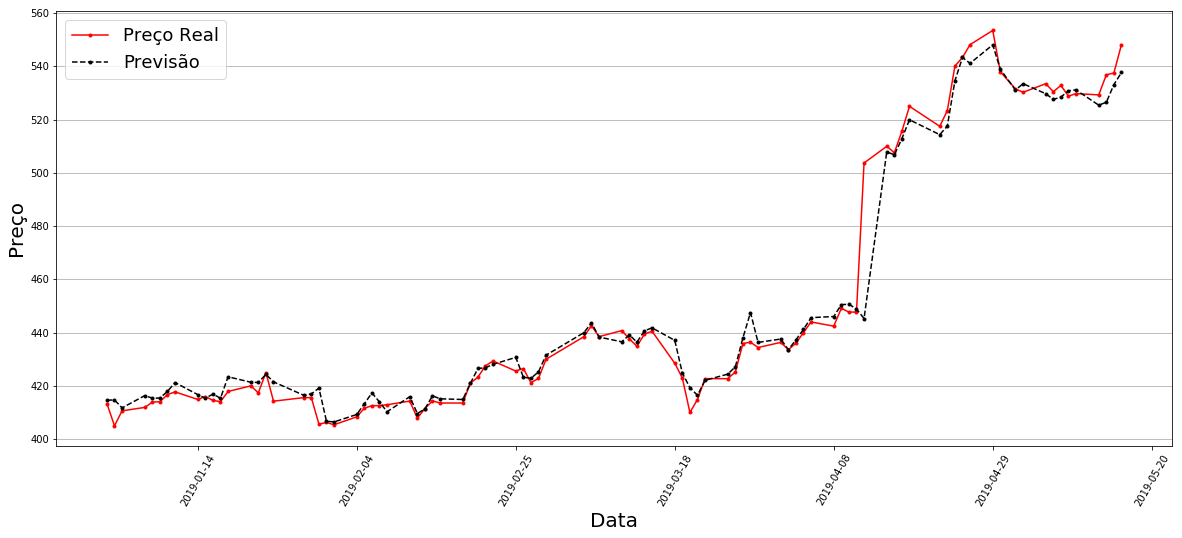

In [687]:
plt.figure(figsize=(20,8))
plt.plot(test.index, y_test, color='red', marker='.', linestyle='-', label='Preço Real')
plt.plot(test.index, pred, color='black', marker='.', linestyle='--', label='Previsão')


plt.legend(loc='upper left', prop={'size':18})
plt.xlabel('Data', fontdict={'size':20})
plt.ylabel('Preço', fontdict={'size':20})
plt.xticks(rotation='60')
plt.grid(axis='y')